# NBM

This demonstrates using data from the National Blend of Models (NBM).

In [1]:
from herbie import Herbie
from herbie.toolbox import EasyMap, pc
from herbie import paint

import matplotlib.pyplot as plt

In [9]:
H = Herbie("2022-05-01 12:00", model="nbm", fxx=1, product="co")

✅ Found ┊ model=nbm ┊ product=co ┊ 2022-May-01 12:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws


In [10]:
H.PRODUCTS

{'ak': 'Alaska; 13-km resolution',
 'co': 'CONUS 13-km resolution',
 'gu': 'Guam 13-km resolution',
 'hi': 'Hawaii 13-km resolution',
 'pr': 'Puerto Rico 13-km resolution'}

In [11]:
H.grib

'https://noaa-nbm-grib2-pds.s3.amazonaws.com/blend.20220501/12/core/blend.t12z.core.f001.co.grib2'

In [12]:
H.SOURCES

{'nomads': 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/blend/prod/blend.20220501/12/core/blend.t12z.core.f001.co.grib2',
 'aws': 'https://noaa-nbm-grib2-pds.s3.amazonaws.com/blend.20220501/12/core/blend.t12z.core.f001.co.grib2'}

In [16]:
H.inventory(":TMP:2 m.*:1 hour fcst:nan")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,?,??,search_this
53,54,67526627,68863208.0,67526627-68863208,2022-05-01 12:00:00,2022-05-01 13:00:00,TMP,2 m above ground,1 hour fcst,NaN,NaN,:TMP:2 m above ground:1 hour fcst:nan


In [17]:
ds = H.xarray(":TMP:2 m.*:1 hour fcst:nan")
ds

<xarray.Dataset> Size: 75MB
Dimensions:              (y: 1597, x: 2345)
Coordinates:
    time                 datetime64[ns] 8B 2022-05-01T12:00:00
    step                 timedelta64[ns] 8B 01:00:00
    heightAboveGround    float64 8B 2.0
    latitude             (y, x) float64 30MB 19.23 19.23 19.24 ... 54.38 54.37
    longitude            (y, x) float64 30MB 233.7 233.7 233.8 ... 300.9 301.0
    valid_time           datetime64[ns] 8B 2022-05-01T13:00:00
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 15MB 292.7 292.7 292.7 ... 268.7 268.7
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          14
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   nbm
    product:                 co
    description:             National Blend of Models
    remote_grib:             https://noaa-nbm-grib2-pds.s3.amazonaws.com/blen...
    local_grib:              /home/blaylock/data/nbm/20220501/subset_6de4710f...
    search:                  :TMP:2 m.*:1 hour fcst:nan

Text(0.0, 1.0, 'NBM: CONUS 13-km resolution')

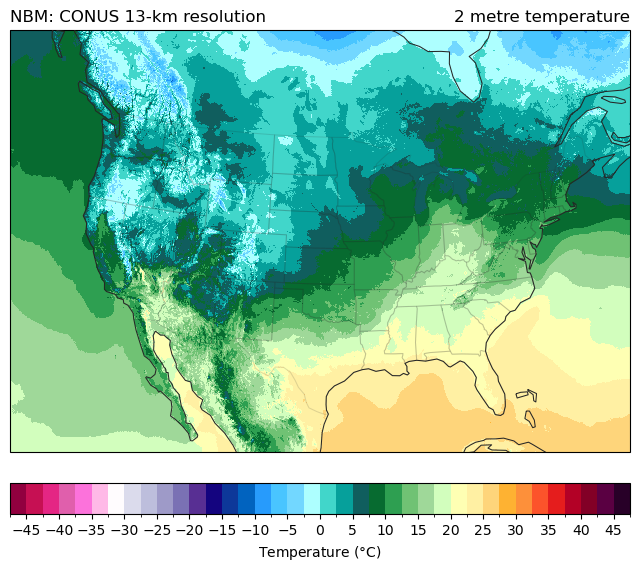

In [22]:
ax = EasyMap(crs=ds.herbie.crs, figsize=[8, 8]).STATES().ax
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t2m - 273.15,
    transform=pc,
    **paint.NWSTemperature.kwargs2,
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **paint.NWSTemperature.cbar_kwargs2
)

ax.set_title(ds.t2m.GRIB_name, loc="right")
ax.set_title(f"{ds.model.upper()}: {H.product_description}", loc="left")

In [25]:
H.inventory(":WIND:10 m above ground:1 hour fcst:nan")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,?,??,search_this
68,69,97035862,98393619.0,97035862-98393619,2022-05-01 12:00:00,2022-05-01 13:00:00,WIND,10 m above ground,1 hour fcst,NaN,NaN,:WIND:10 m above ground:1 hour fcst:nan


In [27]:
ds = H.xarray(":WIND:10 m above ground:1 hour fcst:nan", verbose=True)

📇 Download subset: ▌▌Herbie NBM model co product initialized 2022-May-01 12:00 UTC F01 ┊ source=aws                                                            
 cURL from https://noaa-nbm-grib2-pds.s3.amazonaws.com/blend.20220501/12/core/blend.t12z.core.f001.co.grib2
Found 1 grib messages.
Download subset group 1
  69  :WIND:10 m above ground:1 hour fcst:nan
curl -s --range 97035862-98393619 "https://noaa-nbm-grib2-pds.s3.amazonaws.com/blend.20220501/12/core/blend.t12z.core.f001.co.grib2" > "/home/blaylock/data/nbm/20220501/subset_6de4000a__blend.t12z.core.f001.co.grib2"
💾 Saved the subset to /home/blaylock/data/nbm/20220501/subset_6de4000a__blend.t12z.core.f001.co.grib2


Text(0.0, 1.0, 'NBM: CONUS 13-km resolution')

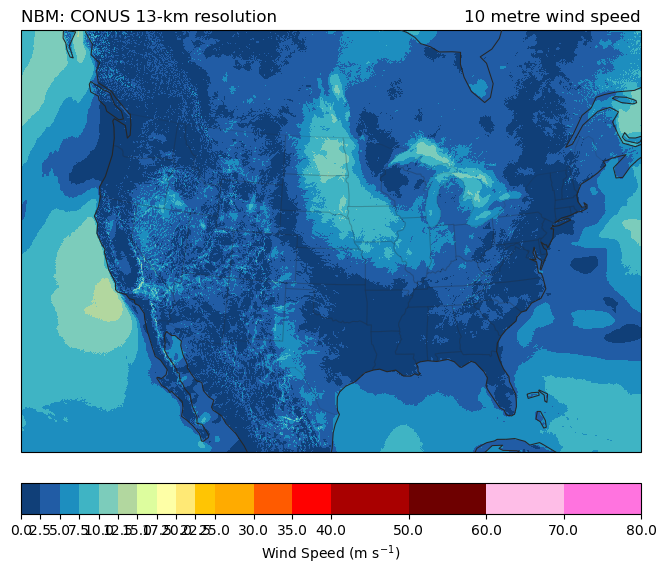

In [29]:
ax = EasyMap(crs=ds.herbie.crs, figsize=[8, 8]).STATES().ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.si10, transform=pc, **paint.NWSWindSpeed.kwargs2
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **paint.NWSWindSpeed.cbar_kwargs2
)

ax.set_title(ds.si10.GRIB_name, loc="right")
ax.set_title(f"{ds.model.upper()}: {H.product_description}", loc="left")